<img src="../figs/logocimat.png" height="20%" width="20%"  align="center"/>

# <center> Ciencia de Datos<center>

<center> Víctor Muñiz Sánchez <center>
<center> Maestría en Cómputo Estadístico <center>

# Métodos de ensamble

Un ejemplo en datos sintéticos

In [3]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import numpy as np
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

plt.rcParams["figure.figsize"] = (6,6)

#para reset
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

Los datos que se usarán

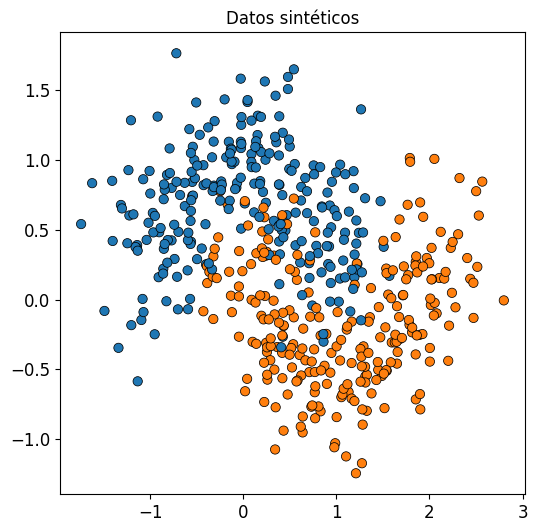

In [4]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y, marker="o", s=45, edgecolor="k", legend=False
).set_title("Datos sintéticos")
#plt.savefig('/home/victor/cursos/emed_2021/notebooks/moons_data.png', format='png')
plt.show()

In [5]:
# bagging, RF y AdaBoost
def get_models1(n_trees):
    models = dict()
    for n in n_trees:
        models[str(n)] = BaggingClassifier(n_estimators=n, n_jobs=-1, random_state=42)
    return models

def get_models2(n_trees):
    models = dict()
    for n in n_trees:
        models[str(n)] = RandomForestClassifier(n_estimators=n, min_samples_split=15, n_jobs=-1, random_state=42)
    return models

def get_models3(n_trees):
    models = dict()
    for n in n_trees:
        models[str(n)] = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=n, 
                                            algorithm="SAMME.R", learning_rate=1, random_state=42)
    return models

# número de árboles a ajustar
n_trees = list(range(0, 1005, 5))[1:]
# obtiene los modelos
models_bag = get_models1(n_trees)
models_rf = get_models2(n_trees)
models_ada = get_models3(n_trees)
# evaluar
results_bag, names_bag = list(), list()
for name, model in models_bag.items():
    model.fit(X_train,y_train)
    scores = model.score(X_test,y_test)
    results_bag.append(scores)
    names_bag.append(name)

results_rf, names_rf = list(), list()
for name, model in models_rf.items():
    model.fit(X_train,y_train)
    scores = model.score(X_test,y_test)
    results_rf.append(scores)
    names_rf.append(name)

results_ada, names_ada = list(), list()
for name, model in models_ada.items():
    model.fit(X_train,y_train)
    scores = model.score(X_test,y_test)
    results_ada.append(scores)
    names_ada.append(name)

Un árbol de clasificación como referencia

In [7]:
ctree = DecisionTreeClassifier(random_state=42)
ctree.fit(X_train, y_train)
res_cart = ctree.score(X_test, y_test)
res_cart

0.856

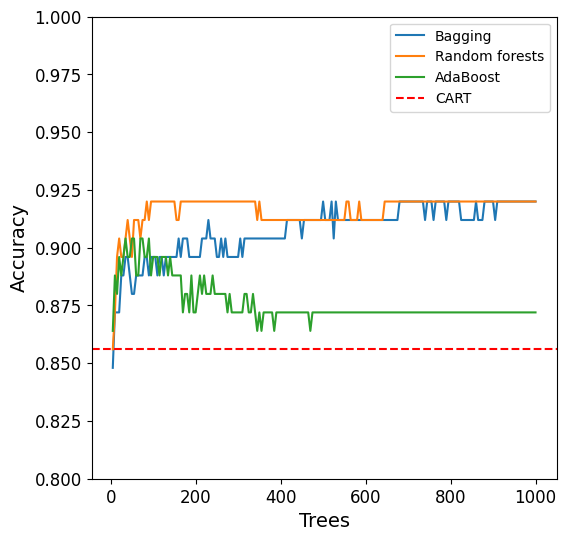

In [8]:
pyplot.plot(n_trees,results_bag, label='Bagging')
pyplot.plot(n_trees,results_rf, label='Random forests')
pyplot.plot(n_trees,results_ada, label='AdaBoost')
pyplot.axhline(y=res_cart, color='r', linestyle='--', label='CART')
plt.ylim([.8, 1])
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Trees')
pyplot.show()

Veamos el desempeño respecto a la exactitud de los modelos. Escogemos algún número específico de modelos combinados para verificarlo.

In [9]:
ntr = '40'

In [10]:
bag_clf = models_bag[ntr]
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_bag))

0.896


In [11]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [12]:
ada_clf = models_ada[ntr]
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_ada))

0.896


In [13]:
rf_clf = models_rf[ntr]
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))

0.912


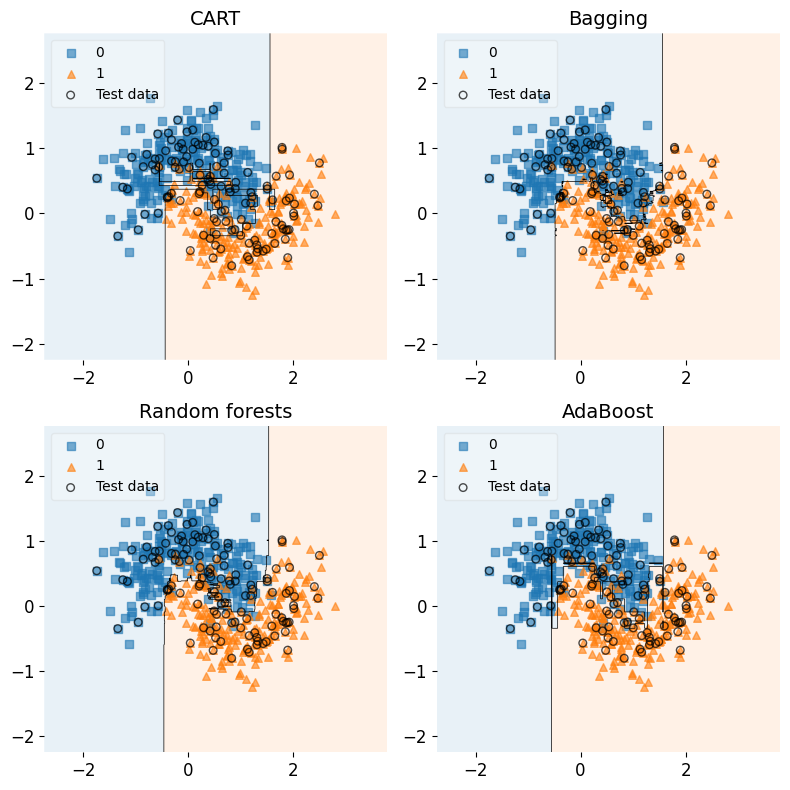

In [18]:
from mlxtend.plotting import plot_decision_regions
scatter_kwargs = {'s': 30, 'edgecolor': None, 'alpha': 0.6}
contourf_kwargs = {'alpha': 0.1}
scatter_highlight_kwargs = {'s': 30, 'label': 'Test data', 'alpha': 0.7}

fix, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8), sharey=True)
plt.sca(axes[0,0])
plot_decision_regions(X, y, clf=tree_clf, legend=2,
                      X_highlight=X_test,
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.title("CART", fontsize=14)
plt.sca(axes[0,1])
plot_decision_regions(X, y, clf=bag_clf, legend=2,
                      X_highlight=X_test,
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.title("Bagging", fontsize=14)
plt.sca(axes[1,0])
plot_decision_regions(X, y, clf=rf_clf, legend=2,
                      X_highlight=X_test,
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.title("Random forests", fontsize=14)
plt.sca(axes[1,1])
plot_decision_regions(X, y, clf=ada_clf, legend=2,
                      X_highlight=X_test,
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.title("AdaBoost", fontsize=14)
plt.ylabel("")
plt.tight_layout()

## Usamos el conjunto de datos Cancer para compararlo con CART

In [37]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

cancer = load_breast_cancer()
X, y = load_breast_cancer(return_X_y=True)
# train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #42

In [27]:
# número de árboles a ajustar
n_trees = list(range(0, 1005, 5))[1:]
# obtiene los modelos
models_bag = get_models1(n_trees)
models_rf = get_models2(n_trees)
models_ada = get_models3(n_trees)
# evaluar
results_bag, names_bag = list(), list()
for name, model in models_bag.items():
    model.fit(X_train,y_train)
    scores = model.score(X_test,y_test)
    results_bag.append(scores)
    names_bag.append(name)

results_rf, names_rf = list(), list()
for name, model in models_rf.items():
    model.fit(X_train,y_train)
    scores = model.score(X_test,y_test)
    results_rf.append(scores)
    names_rf.append(name)

results_ada, names_ada = list(), list()
for name, model in models_ada.items():
    model.fit(X_train,y_train)
    scores = model.score(X_test,y_test)
    results_ada.append(scores)
    names_ada.append(name)

In [28]:
alpha_val = 0.015
# austamos el árbol correspondiente
alpha_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha_val)
alpha_tree.fit(X_train, y_train)
y_cart = alpha_tree.score(X_test, y_test)
print("Accuracy on training set: {:.3f}".format(alpha_tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(y_cart))

Accuracy on training set: 0.965
Accuracy on test set: 0.937


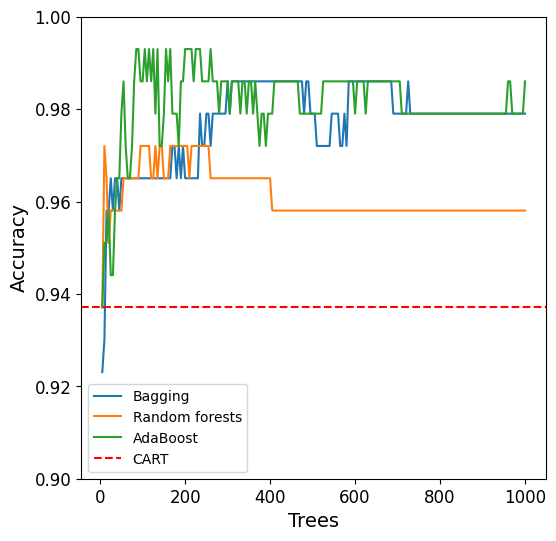

In [30]:
pyplot.plot(n_trees,results_bag, label='Bagging')
pyplot.plot(n_trees,results_rf, label='Random forests')
pyplot.plot(n_trees,results_ada, label='AdaBoost')
pyplot.axhline(y=y_cart, color='r', linestyle='--', label='CART')
plt.ylim([.9, 1])
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Trees')
pyplot.show()

In [50]:
ntr = '300'

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.99      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



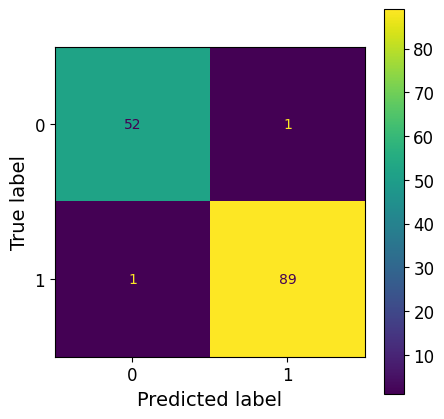

In [51]:
bag_clf = models_bag[ntr]
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)
feature_importances_bag = np.mean([tree.feature_importances_ for tree in bag_clf.estimators_], axis=0)
print(metrics.classification_report(y_test, y_pred_bag))
plt.rcParams['figure.figsize'] = (5, 5)
cm = metrics.confusion_matrix(y_test, y_pred_bag)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

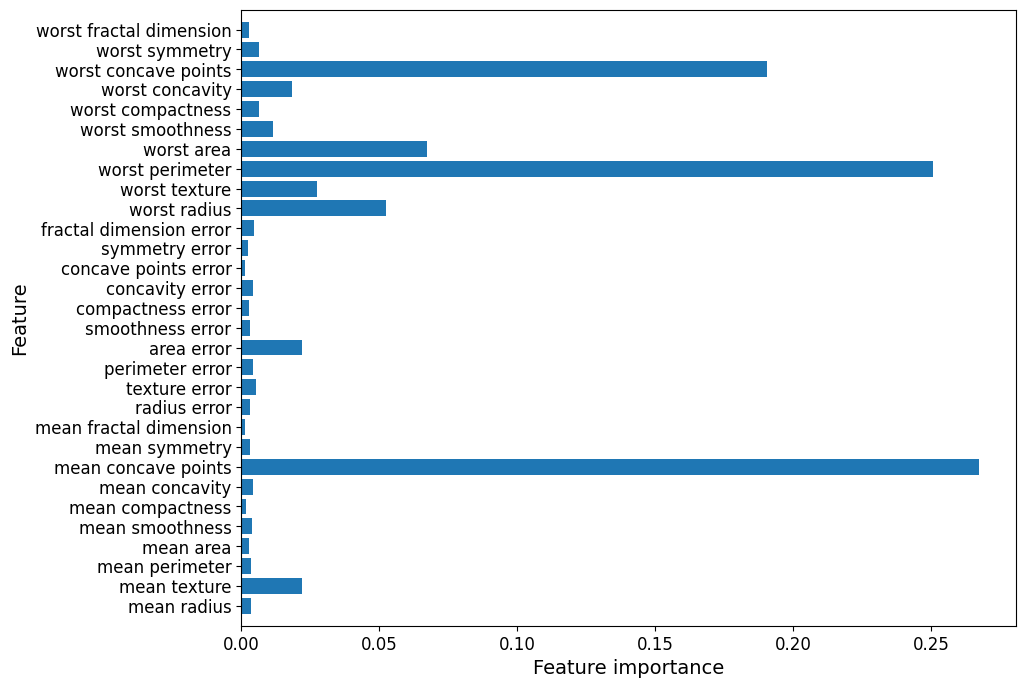

In [52]:
n_features = cancer.data.shape[1]
plt.rcParams['figure.figsize'] = (10, 8)
plt.barh(np.arange(n_features), feature_importances_bag, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.99      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



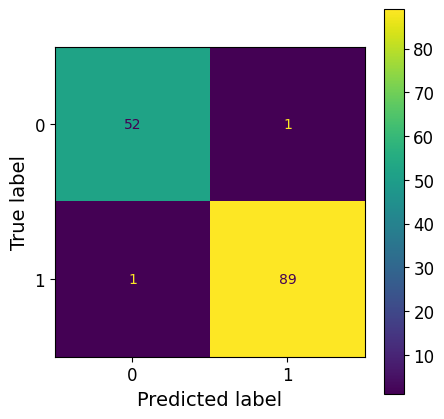

In [53]:
ada_clf = models_ada[ntr]
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)
feature_importances_ada = np.mean([tree.feature_importances_ for tree in ada_clf.estimators_], axis=0)
print(metrics.classification_report(y_test, y_pred_ada))
plt.rcParams['figure.figsize'] = (5, 5)
cm = metrics.confusion_matrix(y_test, y_pred_ada)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

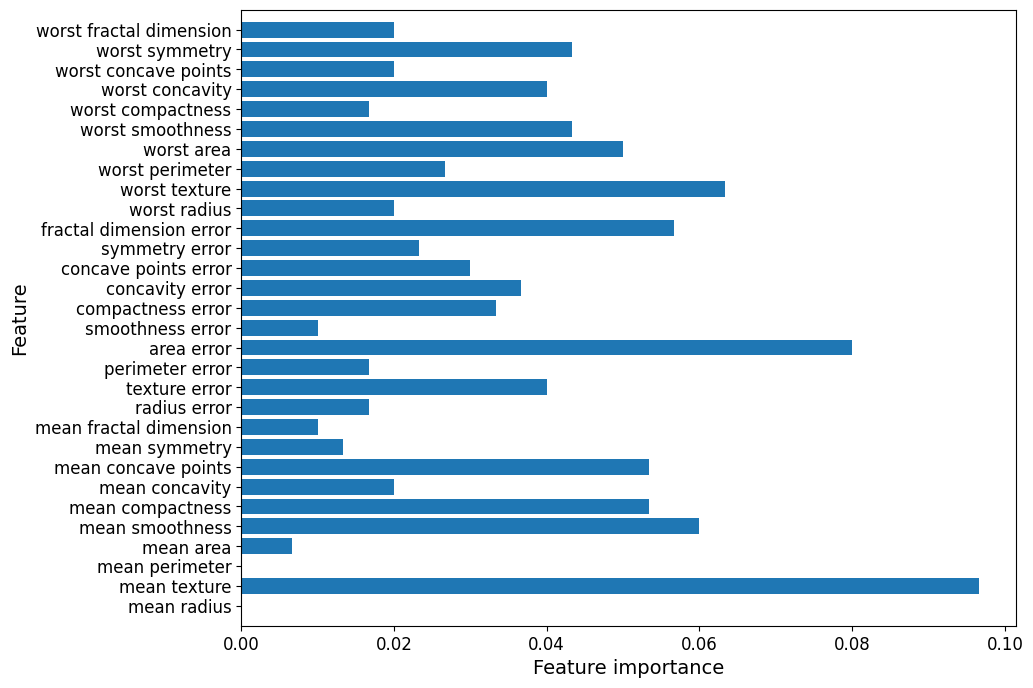

In [54]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.barh(np.arange(n_features), feature_importances_ada, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        53
           1       0.99      0.96      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



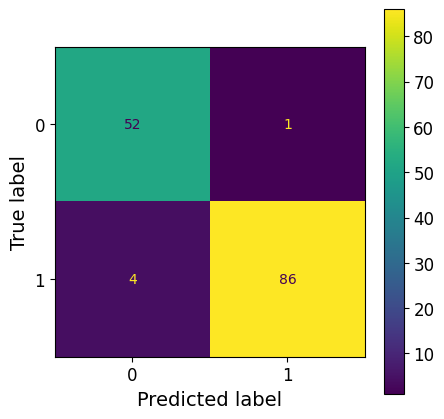

In [55]:
rf_clf = models_rf[ntr]
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
feature_importances_rf = np.mean([tree.feature_importances_ for tree in rf_clf.estimators_], axis=0)
print(metrics.classification_report(y_test, y_pred_rf))
plt.rcParams['figure.figsize'] = (5, 5)
cm = metrics.confusion_matrix(y_test, y_pred_rf)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

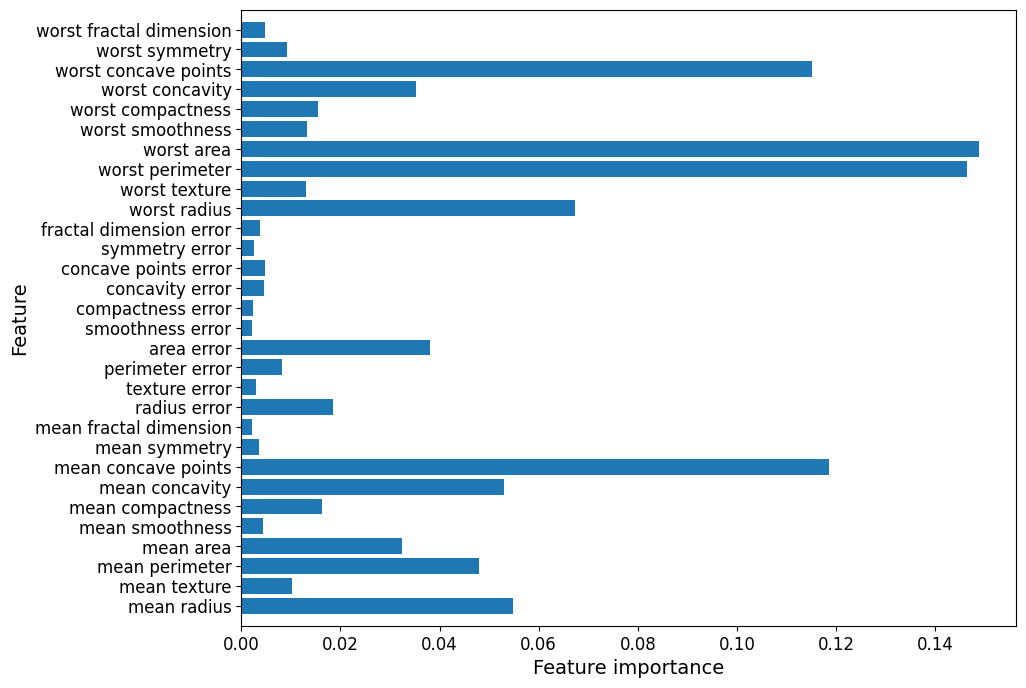

In [56]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.barh(np.arange(n_features), feature_importances_rf, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()